In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
import mysql.connector
import numpy as np


db = mysql.connector.connect(host = 'localhost',
                              username = 'root',
                              password = 'SUYASH@a8055',
                              database = 'ecommerce')



cur = db.cursor()

# 1. List all unique cities where customers are located.








In [3]:
query = """select distinct customer_city from customers"""

cur.execute(query)

data = cur.fetchall()

data


[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [4]:
query = '''select count(order_id) from orders where year(order_purchase_timestamp) = 2017'''
cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are",data[0][0]




('total orders placed in 2017 are', 90202)

# 3. Find the total sales per category.

In [5]:
query = '''select upper(products.product_category) category,
round(sum(payments.payment_value),2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category



'''
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['Category','Sales'])
df



,Category,Sales
0,PERFUMERY,1013477.32
1,FURNITURE DECORATION,2860352.78
2,TELEPHONY,973764.10
3,BED TABLE BATH,3425107.34
4,AUTOMOTIVE,1704588.66
...,...,...
69,CDS MUSIC DVDS,2398.86
70,LA CUISINE,5827.06
71,FASHION CHILDREN'S CLOTHING,1571.34
72,PC GAMER,4348.86


# 4. Calculate the percentage of orders that were paid in installments.

In [6]:
query = ''' select (sum(case when payment_installments >=1 then 1
else 0 end ))/count(*)*100 from payments
'''
cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is ",data[0][0]

('the percentage of orders that were paid in installments is ',
 Decimal('99.9981'))

# Count the number of customers from each state. 


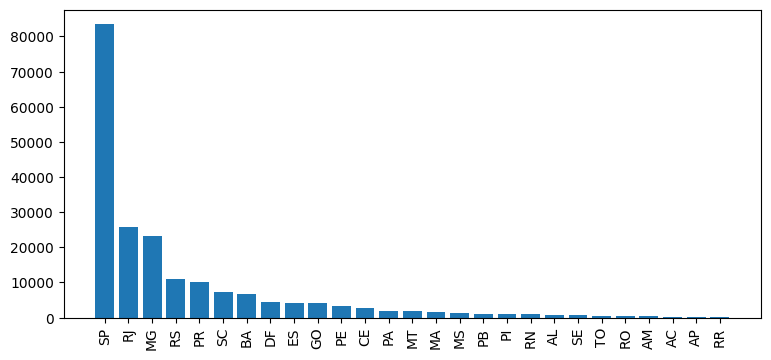

In [7]:
query = ''' select customer_state, count(customer_id)
from customers group by customer_state
'''
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['state','customer_count'])
df = df.sort_values(by = 'customer_count',ascending=False)
plt.figure(figsize=(9,4))
plt.bar(df['state'], df['customer_count'])
plt.xticks(rotation = 90)
plt.show()

 # Calculate the number of orders per month in 2018.

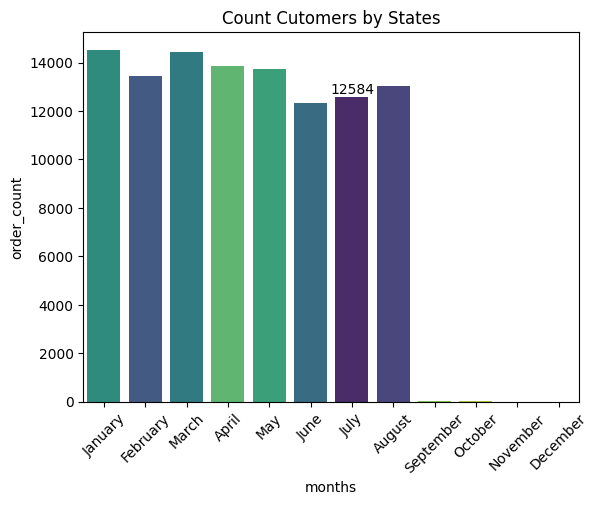

In [8]:
query = """ select monthname(order_purchase_timestamp)months, count(order_id) order_count 
from orders where year(order_purchase_timestamp) = 2018
group by months """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=['months','order_count'])
o = ['January','February','March','April','May','June','July','August','September','October','November','December']
ax = sb.barplot(x = df['months'],y = df['order_count'],data = df , order = o, hue = df['months'],palette = 'viridis')
plt.xticks(rotation = 45)

ax.bar_label(ax.containers[0])
plt.title('Count Cutomers by States')

plt.show()

# Find the average number of products per order, grouped by customer city.

In [9]:
query = """ with count_per_order as
(select orders.order_id,orders.customer_id,count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city,round(avg(count_per_order.oc ),2)average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
;
 """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data,columns = ['customer_city','average products/order'])
df.head(10)




,customer_city,average products/order
0,padre carvalho,14.00
1,celso ramos,13.00
2,datas,12.00
3,candido godoi,12.00
4,matias olimpio,10.00
5,cidelandia,8.00
6,picarra,8.00
7,morro de sao paulo,8.00
8,teixeira soares,8.00
9,curralinho,8.00


# Calculate the percentage of total revenue contributed by each product category.

In [10]:
query =  """ select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value)from payments))*100,2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id 
group by category order by sales_percentage desc;

"""



cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data , columns=['Category','Percenage_Distribution'])
df.head()



,Category,Percenage_Distribution
0,BED TABLE BATH,21.40
1,HEALTH BEAUTY,20.71
2,COMPUTER ACCESSORIES,19.81
3,FURNITURE DECORATION,17.87
4,WATCHES PRESENT,17.86


# Identify the correlation between product price and the number of times a product has been purchased.

In [11]:
query =  """ SELECT products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;

"""



cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data , columns=['Category','order_count','price'])

arr1 = df['order_count']
arr2 = df['price']
a = np.corrcoef([arr1,arr2])

print('the correlation between price and number of times a product has been purchased is ',a[0],[1])

the correlation between price and number of times a product has been purchased is  [ 1.         -0.10631514] [1]


#  Calculate the total revenue generated by each seller, and rank them by revenue.

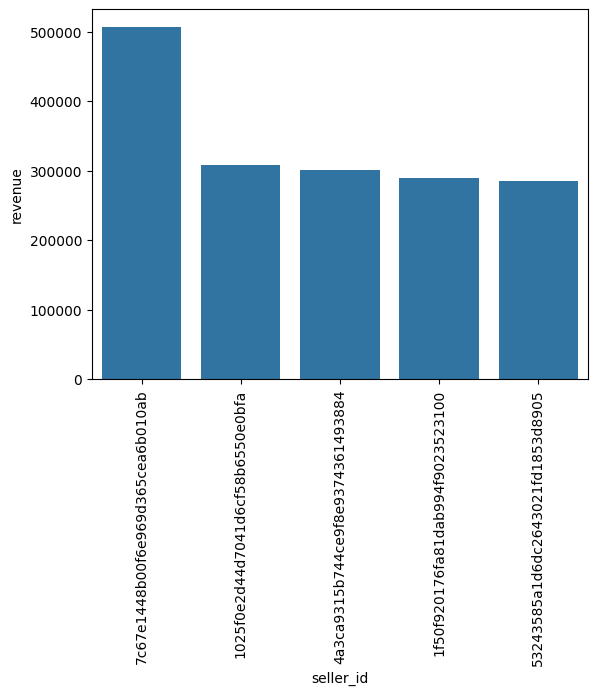

In [12]:
query =  """ select * ,dense_rank() over(order by revenue desc)
from (select order_items.seller_id, sum(Payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a

"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['seller_id','revenue','rank'])
df = df.head()
sb.barplot(x = 'seller_id',y = 'revenue',data = df)
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history

In [13]:
query =  """ select customer_id, order_purchase_timestamp,payment,
avg(payment) over(partition  by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from 
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a;


"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Customer_id','history','price','moving_average'])
df


,Customer_id,history,price,moving_average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
...,...,...,...,...
207767,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
207768,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207769,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207770,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# Calculate the cumulative sales per month for each year.

In [14]:
query = """ select years, months,sum(payment)
over(order by years,months) as cumulative_sales from 
(SELECT year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years,months) as a;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Years','Months','Cumulative Sales'])
df




,Years,Months,Cumulative Sales
0,2016,9,504.48
1,2016,10,118685.44
2,2016,12,118724.68
3,2017,1,395700.76
4,2017,2,979516.78
5,2017,3,1879243.98
6,2017,4,2714820.04
7,2017,5,3900657.68
8,2017,6,4923210.44
9,2017,7,6107976.28


# Calculate the year-over-year growth rate of total sales.

In [15]:
query = """ with  a as(select year (orders.order_purchase_timestamp)as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id 
group by years order by years)


select years,(payment -lag(payment, 1) over(order by years))/
lag(payment,1) over(order by years) * 100 from a 
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Years','yoy * growth '])
df


,Years,yoy * growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [20]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id,count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/count(distinct b.customer_id ))
from a left join b
on a.customer_id  = b.customer_id;

"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=[])
df

,0
0,None


# identify the top 3 customers who spent the most money in each year.

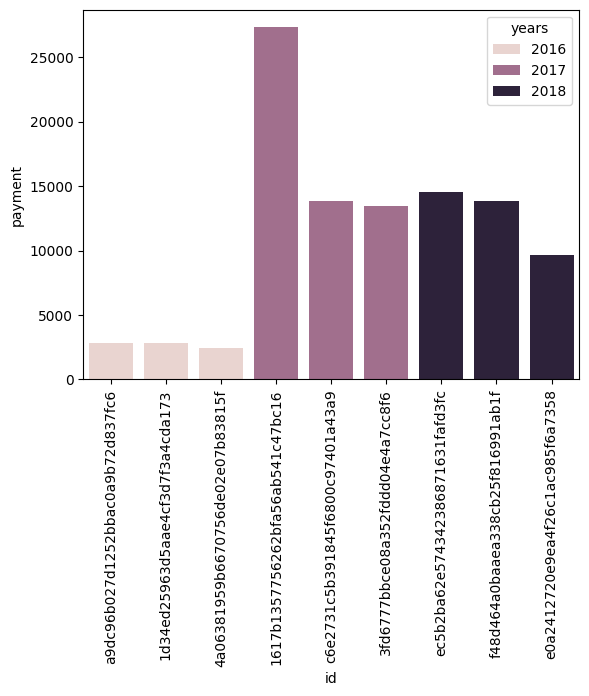

In [29]:
query = """
select years,customer_id,payment,d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value)desc)d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3;

"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["years","id","payment","rank"])
sb.barplot(x = 'id',y = 'payment',data = df,hue = "years")
plt.xticks(rotation = 90)

plt.show()